## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


If you did everything correct the result should look like the following picture.

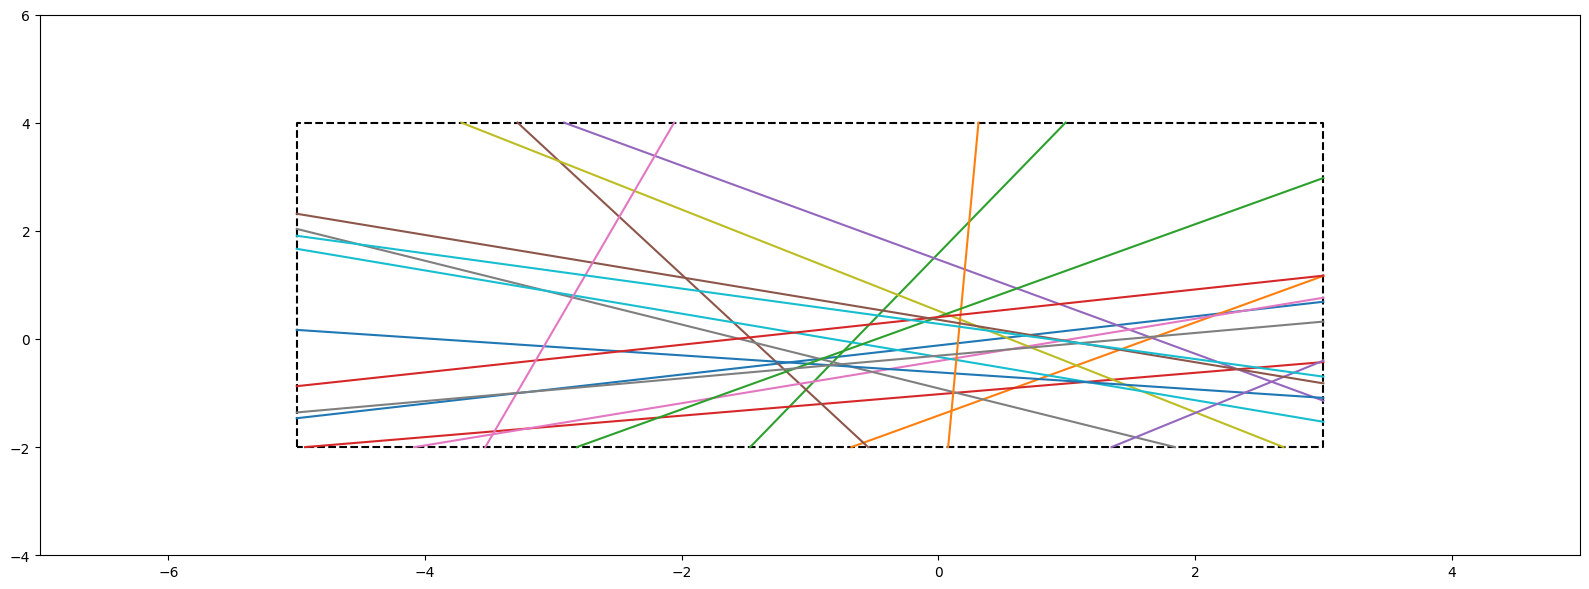

In [3]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    lx, ly, ux, uy = box  # 4 values
    intersections = np.empty((0, 2))    # Use to store intersection point
    bias = bias.item()  # Convert bias from a single-element array to a scalar
    
    #### EQUATION: b0 + b1*x + b2*y = 0

    # Find intersections with vertical lines 
    # Subs x = lx in equation
    if vec[1] != 0:  # To avoid denominator = 0 >> math error
        y_lx = (((-vec[0]) * lx) - bias) / vec[1]
        if ly <= y_lx <= uy:  # Check whether the intersection is within range of y
            intersections = np.append(intersections, [[lx, y_lx]], axis=0)    # Coord. of the intersection point
    
    # Subs x = ux in equation
    if vec[1] != 0:  # To avoid denominator = 0 >> math error
        y_ux = (((-vec[0]) * ux) - bias) / vec[1]
        if ly <= y_ux <= uy:  # Check whether the intersection is within range of y
            intersections = np.append(intersections, [[ux, y_ux]], axis=0)    # Coord. of the intersection point

    # Find intersections with horizontal lines 
    # Subs y = ly in equation
    if vec[0] != 0:  # To avoid denominator = 0 >> math error
        x_ly = (((-vec[1]) * ly) - bias) / vec[0]
        if lx <= x_ly <= ux:  # Check whether the intersection is within range of x
            intersections = np.append(intersections, [[x_ly, ly]], axis=0)    # Coord. of the intersection point
    
    # Subs y = uy in equation
    if vec[0] != 0:  # To avoid denominator = 0 >> math error
        x_uy = (((-vec[1]) * uy) - bias) / vec[0]
        if lx <= x_uy <= ux:  # Check whether the intersection is within range of x
            intersections = np.append(intersections, [[x_uy, uy]], axis=0)    # Coord. of the intersection point

    # Check whether the np.array contains of two intersection points # Check row number
    if intersections.shape[0] == 2:
        X, Y = intersections[:, 0], intersections[:, 1]
        return X, Y
    else:
        return np.array([None, None]), np.array([None, None])

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2);
ax.set_ylim(ly-2, uy+2);
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")